# Estación Urb. Embajada (Barajas)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from itertools import product

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

In [4]:
df = pd.read_csv("../data/df_50.csv", index_col=0)
df.index = pd.to_datetime(df.index)

In [5]:
df.head()

,NO2
month,
2013-01-01,54.290323
2013-02-01,45.419355
2013-03-01,40.516129
2013-04-01,34.838710
2013-05-01,35.096774


### Estacionalidad

In [6]:
df2 = df.copy()

In [7]:
df2["año"] = df.index.year
df2["mes"] = df.index.month

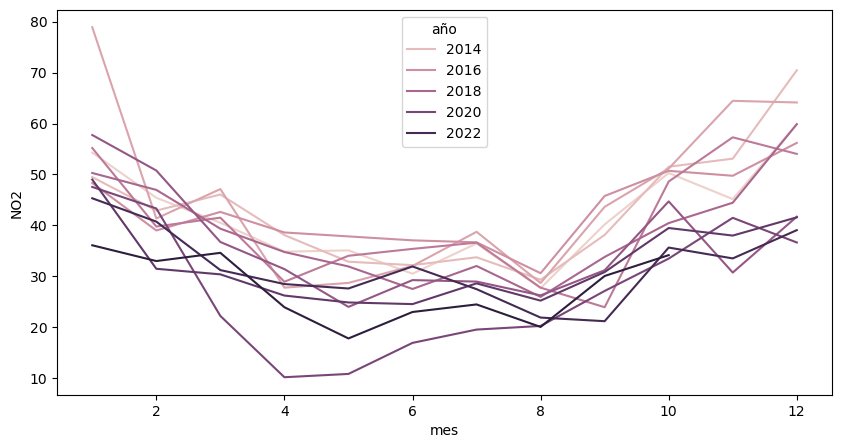

In [8]:
sns.lineplot(x = "mes", y = "NO2", hue = "año", data = df2);

### Estacionaridad

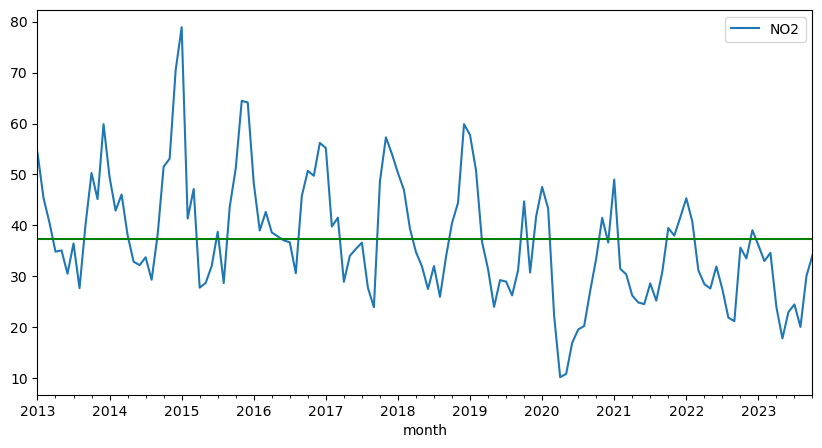

In [9]:
df.plot()
plt.axhline(df.NO2.mean(), c = "g");

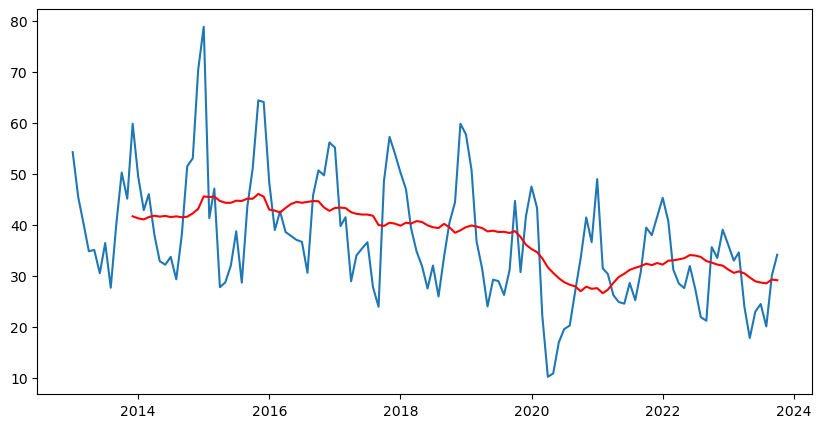

In [10]:
plt.plot(df["NO2"])
plt.plot(df.rolling(window= 12).mean(), c = "r");

In [22]:
df.head()

,NO2
month,
2013-01-01,54.290323
2013-02-01,45.419355
2013-03-01,40.516129
2013-04-01,34.838710
2013-05-01,35.096774


In [21]:
df2.head()

,NO2,año,mes
month,,,
2013-01-01,54.290323,2013,1
2013-02-01,45.419355,2013,2
2013-03-01,40.516129,2013,3
2013-04-01,34.838710,2013,4
2013-05-01,35.096774,2013,5


In [28]:
df3 = df.copy()

In [29]:
df3["year"] = df3.index.year
df3["month"] = df2.index.month
df3.head()

,NO2,year,month
month,,,
2013-01-01,54.290323,2013,1
2013-02-01,45.419355,2013,2
2013-03-01,40.516129,2013,3
2013-04-01,34.838710,2013,4
2013-05-01,35.096774,2013,5


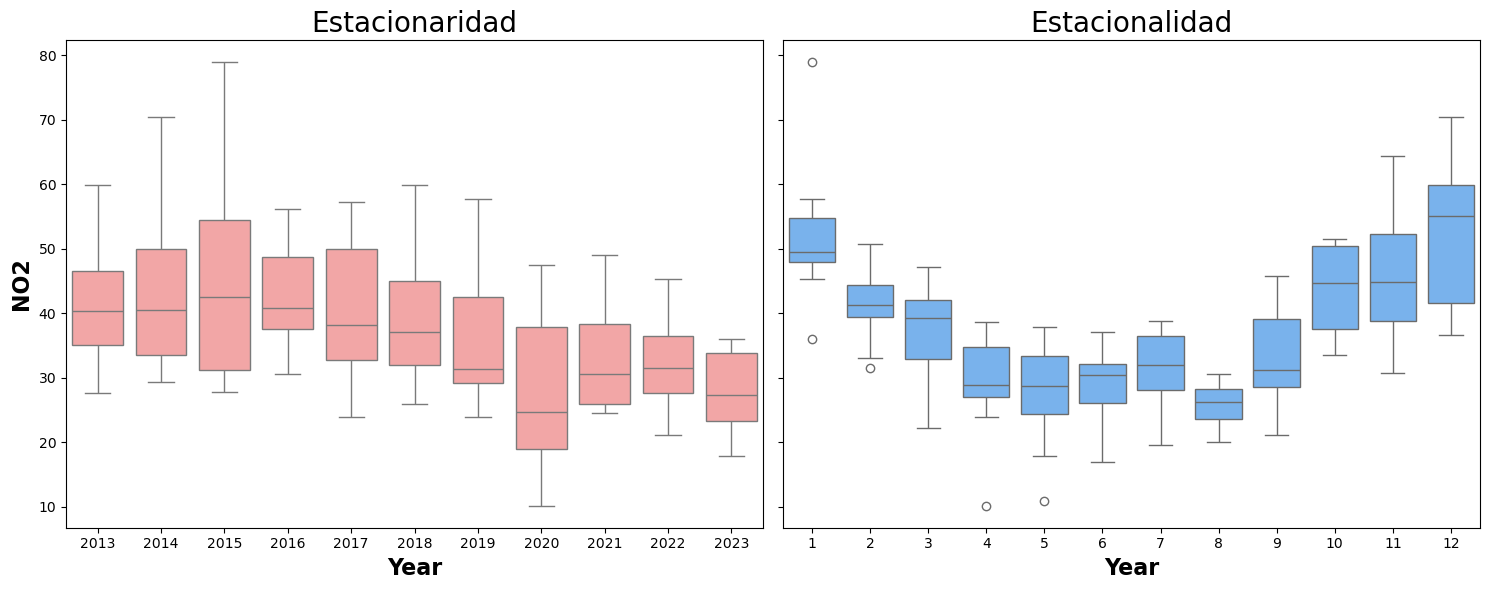

In [47]:
# Nos creamos una lista con las columnas de tiempo
tiempo = df3.columns.drop("NO2")

# Iniciamos los subplots
fig, ax = plt.subplots(nrows=1, ncols=len(tiempo), figsize=(15, 6), sharey=True)

# Nombres personalizados para los títulos
nombres = ["Estacionaridad", "Estacionalidad"]

# Colores bonitos para los boxplots
colores = ["#FF9999", "#66B2FF"]  # Puedes modificar estos códigos de colores

# Hacemos un loop para crear los boxplots para cada año
for i, col in enumerate(tiempo):
    sns.boxplot(data=df3, x=col, y="NO2", ax=ax[i], palette=[colores[i]])
    ax[i].set_title(nombres[i], fontsize=20, loc='center')
    ax[i].set_xlabel('Year', fontsize=16, fontdict=dict(weight='bold'))
    ax[i].set_ylabel('NO2', fontsize=16, fontdict=dict(weight='bold'))

plt.tight_layout()
plt.show()


No hay estacionaridad.

### Test de Fuller

In [50]:
res = adfuller(df["NO2"])
res

(-0.46595693860402887,
 0.8984903212468736,
 11,
 118,
 {'1%': -3.4870216863700767,
  '5%': -2.8863625166643136,
  '10%': -2.580009026141913},
 780.622248247229)

In [51]:
print("AD Fuller Stats", res[0])
print("p-value", res[1])
print("Critical values")

for k, v in res[4].items():
    print(k, round(v, 2))

AD Fuller Stats -0.46595693860402887
p-value 0.8984903212468736
Critical values
1% -3.49
5% -2.89
10% -2.58


*Datos no estacionarios. Su media y su varianza están en función del tiempo 🍋*

### Autocorrelación

In [52]:
for i in range(49):
    print(f"{i} mes Lag, {df['NO2'].autocorr(lag= i)}")

0 mes Lag, 1.0
1 mes Lag, 0.7266791847365822
2 mes Lag, 0.4675534785951964
3 mes Lag, 0.19605257912445478
4 mes Lag, -0.05411786220111848
5 mes Lag, -0.21003095848671038
6 mes Lag, -0.23761706549996198
7 mes Lag, -0.2356242820168882
8 mes Lag, -0.05161071840661186
9 mes Lag, 0.21435640636362585
10 mes Lag, 0.4532549029190686
11 mes Lag, 0.6539105160836354
12 mes Lag, 0.7597055616541317
13 mes Lag, 0.633705512264369
14 mes Lag, 0.3899083316922654
15 mes Lag, 0.13727759215507132
16 mes Lag, -0.1556646888920466
17 mes Lag, -0.2926014783767325
18 mes Lag, -0.29785415378095365
19 mes Lag, -0.2630206756074485
20 mes Lag, -0.09856858783148599
21 mes Lag, 0.13090678462912583
22 mes Lag, 0.3396198787021433
23 mes Lag, 0.5943113757404315
24 mes Lag, 0.7288145027843359
25 mes Lag, 0.5856654914200252
26 mes Lag, 0.3900807588372408
27 mes Lag, 0.12952428466603916
28 mes Lag, -0.11320724420951389
29 mes Lag, -0.28034610914762004
30 mes Lag, -0.3206827132647046
31 mes Lag, -0.2799005677295864
32 mes 

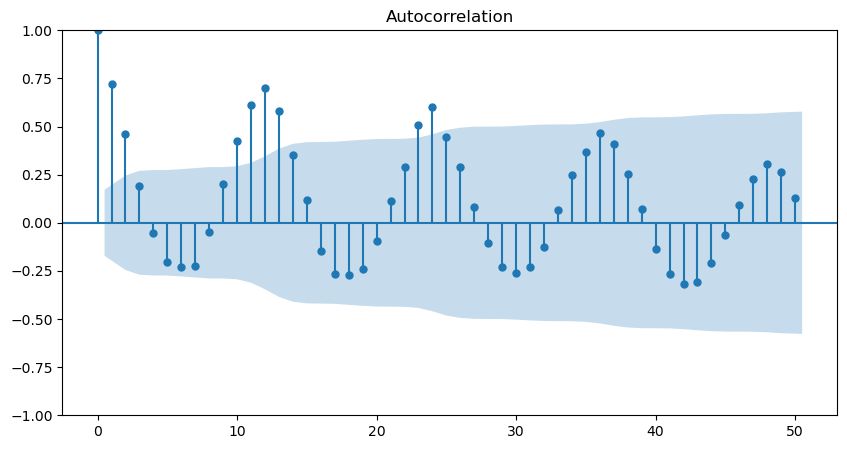

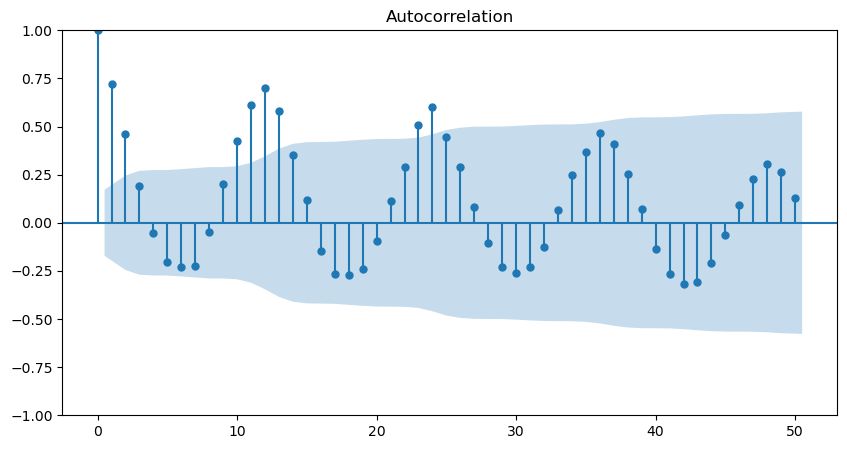

In [53]:
plot_acf(df, lags = 50)

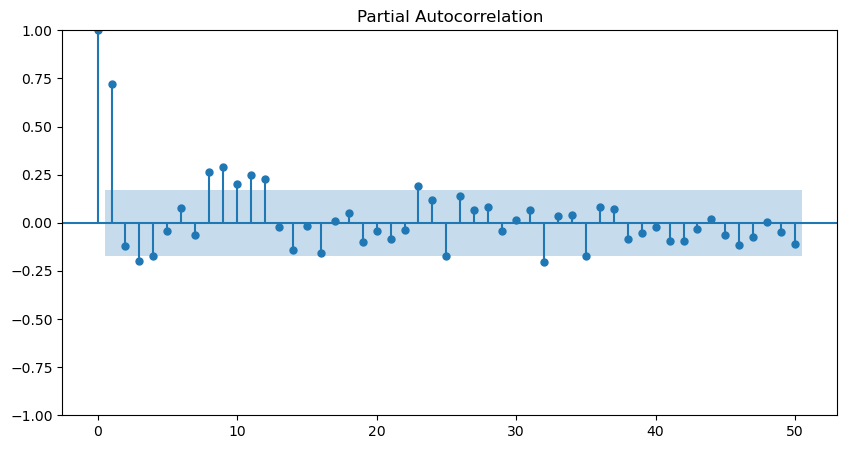

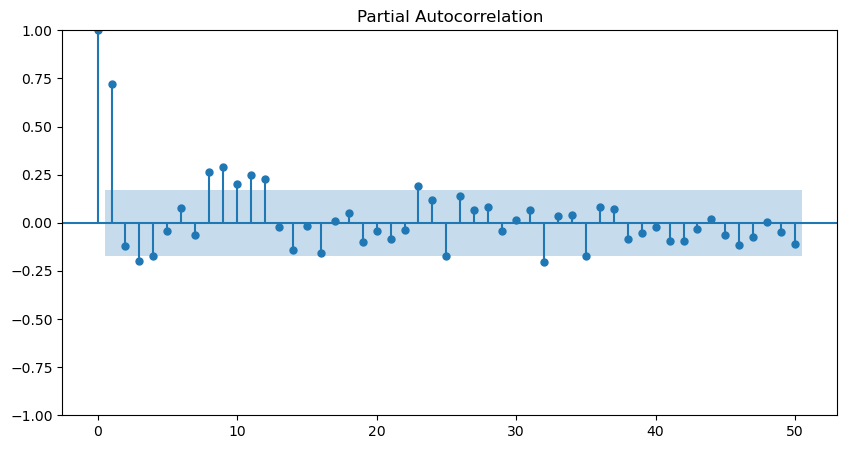

In [54]:
plot_pacf(df, lags = 50)

In [55]:
df.head()

,NO2
month,
2013-01-01,54.290323
2013-02-01,45.419355
2013-03-01,40.516129
2013-04-01,34.838710
2013-05-01,35.096774


In [56]:
df.shape

(130, 1)

In [57]:
df.isnull().sum()

NO2    0
dtype: int64

## SARIMA

In [58]:
y_test = df["NO2"][-30:]
y_train = df["NO2"][:-30]

In [59]:
ps = range(4)
ds = range(1,3)
qs = range(3)

parameters = list(product(ps,ds, qs))
print(parameters)

[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 2, 0), (3, 2, 1), (3, 2, 2)]


In [60]:
%%time
rmse = []
order = []
for p, d, q in tqdm(parameters):
    try:
        modelo=ARIMA(y_train, order=(p, d, q)).fit()
        pred = modelo.predict(start=len(y_train), end=len(df) -1)
        error = np.sqrt(np.mean(mean_squared_error(y_test, pred)))
        rmse.append(error)
        order.append((p,d, q))
    except: 
        continue

  0%|          | 0/24 [00:00<?, ?it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_

 58%|█████▊    | 14/24 [00:00<00:00, 29.73it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packag

CPU times: total: 547 ms
Wall time: 1.25 s


In [61]:
# veamos los resultados de todos los modelos
results = pd.DataFrame({"RMSE": rmse, "order": order})
results.sort_values(by="RMSE", inplace=True)
results.head()

,RMSE,order
20,4.891410,"(3, 1, 2)"
19,7.180102,"(3, 1, 1)"
14,7.530622,"(2, 1, 2)"
18,7.699776,"(3, 1, 0)"
7,7.963030,"(1, 1, 1)"


In [62]:
%%time

modelo=SARIMAX(endog=y_train, 
               exog=None,
               #order=(4, 1, 5),  # modelo arima
               seasonal_order=(3, 1, 2, 12) # modelo sarima, estacionalidad es el ultimo
              ).fit(disp=False)
                     
pred=modelo.predict(len(y_train), len(df)-1)  

error=(pred-y_test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':y_test, 'pred':pred, 'error':pred-y_test})
res

C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error mae:  4.4965340073715465
CPU times: total: 1.59 s
Wall time: 5.02 s


,real,pred,error
2021-05-01,24.870968,23.423300,-1.447667
2021-06-01,24.548387,26.053956,1.505569
2021-07-01,28.612903,28.151953,-0.460951
2021-08-01,25.225806,25.115363,-0.110444
2021-09-01,30.838710,33.177787,2.339077
2021-10-01,39.483871,42.283018,2.799147
2021-11-01,38.000000,40.383902,2.383902
2021-12-01,41.580645,47.846660,6.266015
2022-01-01,45.322581,52.466555,7.143974
2022-02-01,40.741935,40.613435,-0.128501


In [63]:
pred["real_test"] = y_test

In [64]:
pred_año = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 12))
pred_año

,predicted_mean
2023-11-01,44.301436
2023-12-01,50.147395
2024-01-01,53.294427
2024-02-01,39.969463
2024-03-01,35.495230
2024-04-01,27.836035
2024-05-01,26.093838
2024-06-01,28.020921
2024-07-01,30.523270
2024-08-01,26.000416


In [ ]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [ ]:
pred_año.mean()

In [ ]:
#Corrección primer valor de la predicción

# Obtener el valor de la fila '2023-11-01' y columna 'predicted_mean' en pred_año
valor_pred_año = pred_año.loc['2023-11-01', 'predicted_mean']

# Obtener el valor de la fila '2023-10-01' y columna 'NO2' en df
valor_df = df.loc['2023-10-01', 'NO2']

# Calcular la media entre los dos valores
media = (valor_pred_año + valor_df) / 2

# Sustituir el valor calculado en pred_año
pred_año.loc['2023-11-01', 'predicted_mean'] = media

In [ ]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [ ]:
pred_año.mean()